In [2]:
import pandas as pd
import json

In [3]:
# read the cleaned data
df = pd.read_json('cleanedData.json')

In [4]:
df.head()

,id,categories,abstract,encoded_categories,stemmed abstract,lemma abstract
0,0704.0001,hep-ph,fully differential calculation perturbative qu...,5760,fulli differenti calcul perturb quantum chromo...,fully differential calculation perturbative qu...
1,0704.0002,math cs,describe new algorithm kellpebble game colors ...,7408,describ new algorithm kellpebbl game color use...,describe new algorithm kellpebble game color u...
2,0704.0003,physics-ph,evolution earthmoon system described dark matt...,10234,evolut earthmoon system describ dark matter fi...,evolution earthmoon system described dark matt...
3,0704.0004,math,show determinant stirling cycle numbers counts...,7149,show determin stirl cycl number count unlabel ...,show determinant stirling cycle number count u...
4,0704.0005,math,paper show compute lambda_alpha norm alphage 0...,7149,paper show comput lambda_alpha norm alphag 0 u...,paper show compute lambda_alpha norm alphage 0...


In [5]:
len(df['categories'].unique())

13373

In [9]:
df['categories'].unique()

array(['hep-ph', 'math cs', 'physics-ph', ...,
       'supr-con cond-mat-sci cond-mat-con',
       'supr-con cond-mat-sci cond-mat-con nlin patt-sol',
       'supr-con cond-mat-con quant-ph'], dtype=object)

In [22]:
# Checking length of each article
length = []
[length.append(len(str(text))) for text in df['abstract']]
df['length'] = length
print('Minimum Length: ', min(df['length']), '\nMaximum Length: ', max(df['length']), '\nAverage Length: ', round(sum(df['length'])/len(df['length'])))

Minimum Length:  0 
Maximum Length:  4502 
Average Length:  690


In [24]:
print('Number of articles with less than 50 words: ', len(df[df['length'] < 50]))

Number of articles with less than 50 words:  2015


In [25]:
# Removing outliers
df = df.drop(df['abstract'][df['length'] < 50].index, axis = 0)
print('Minimum Length: ', min(df['length']), '\nMaximum Length: ', max(df['length']), '\nAverage Length: ', round(sum(df['length'])/len(df['length'])))

Minimum Length:  50 
Maximum Length:  4502 
Average Length:  691


In [26]:
len(df)

2125344

In [23]:
df.head()

,id,categories,abstract,encoded_categories,stemmed abstract,lemma abstract,length
0,0704.0001,hep-ph,fully differential calculation perturbative qu...,5760,fulli differenti calcul perturb quantum chromo...,fully differential calculation perturbative qu...,726
1,0704.0002,math cs,describe new algorithm kellpebble game colors ...,7408,describ new algorithm kellpebbl game color use...,describe new algorithm kellpebble game color u...,610
2,0704.0003,physics-ph,evolution earthmoon system described dark matt...,10234,evolut earthmoon system describ dark matter fi...,evolution earthmoon system described dark matt...,616
3,0704.0004,math,show determinant stirling cycle numbers counts...,7149,show determin stirl cycl number count unlabel ...,show determinant stirling cycle number count u...,195
4,0704.0005,math,paper show compute lambda_alpha norm alphage 0...,7149,paper show comput lambda_alpha norm alphag 0 u...,paper show compute lambda_alpha norm alphage 0...,140


In [27]:
df1 = df.groupby(['categories'])['categories'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)

In [28]:
df1.head()

,categories,Count
7147,math,361543
4191,cs,263572
49,astro-ph,241144
5759,hep-ph,77454
12062,quant-ph,60922


In [38]:
#df2=df

In [41]:
#df3=df2.groupby(['categories']).size().sort_values(ascending=False).reset_index(name='count')
   

In [42]:
#df3.head(60)

,categories,count
0,math,361543
1,cs,263572
2,astro-ph,241144
3,hep-ph,77454
4,quant-ph,60922
5,physics-ph,59043
6,hep-th,56042
7,cs math,40383
8,cond-mat-sci,36530
9,cond-mat-hall,32859


In [ ]:
#'math','cs','stat','physics','hep-th','hep-ex','q-bio','cond-mat-sci','gr-qc'
'''
categories	count
0	math	361543
1	cs	263572
2	hep-th	56042
3	cond-mat-sci	36530
4	gr-qc	27921
5	stat	21696
6	hep-ex	16662
7	physics	14257
8	q-bio	13668

'''

In [71]:
#pulling out top 09 categories
smallerData = df[df["categories"].isin(["math", "cs", "physics",
                                            "cond-mat-sci", "hep-th",'q-bio'])]

In [72]:
smallerData.groupby(['categories']).size()

categories
cond-mat-sci     36530
cs              263572
hep-th           56042
math            361543
physics          14257
q-bio            13668
dtype: int64

In [73]:
smallerdf = smallerData.groupby(['categories']).head(13000)

In [74]:
smallerdf.groupby(['categories']).size()

categories
cond-mat-sci    13000
cs              13000
hep-th          13000
math            13000
physics         13000
q-bio           13000
dtype: int64

In [75]:
# Skimming through such short texts just to be sure
print(smallerdf['abstract'][smallerdf['length'] < 50])

Series([], Name: abstract, dtype: object)


In [76]:
len(smallerdf)

78000

In [77]:
smallerdf['stemmed abstract'].isnull().values.any()

False

In [78]:
# Minimum length is 1. We need to spot some outliers and get rid of them. Counting how many outliers are there
print('Number of articles with less than 50 words: ', len(smallerdf[smallerdf['length'] ==0]))

Number of articles with less than 50 words:  0


In [79]:
#splitting test and train data ahead of time    #######
from sklearn.model_selection import train_test_split
X = smallerdf["stemmed abstract"]
y = smallerdf['encoded_categories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [80]:
#TF IDF with stems  #####
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer(max_df = 0.8, min_df = .1)
X_train_knn = vectorizer.fit_transform(X_train)
X_test_knn = vectorizer.transform(X_test)

In [82]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=30) #algorithm = "brute", n_jobs=-1
neigh.fit(X_train_knn, y_train)
print(neigh.score(X_test_knn, y_test)) 

0.5842948717948718


In [89]:
from sklearn import metrics
range_k = range(5,15)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train_knn, y_train)
   y_pred = classifier.predict(X_test_knn)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[1421  191  175  284  288  298]
 [  81 1560  107  513   58  273]
 [ 188  146 1575  503   33  140]
 [ 100  339  244 1812   26   86]
 [ 385  187  172  265 1388  143]
 [ 277  459  205  348  100 1230]]
Classification Report:
              precision    recall  f1-score   support

        3834       0.58      0.53      0.56      2657
        4192       0.54      0.60      0.57      2592
        6312       0.64      0.61      0.62      2585
        7149       0.49      0.70      0.57      2607
        9082       0.73      0.55      0.63      2540
       11563       0.57      0.47      0.51      2619

    accuracy                           0.58     15600
   macro avg       0.59      0.58      0.58     15600
weighted avg       0.59      0.58      0.58     15600



Text(0, 0.5, 'Accuracy')

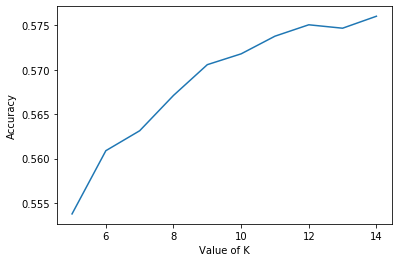

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [96]:
from sklearn.ensemble import RandomForestClassifier                     
rfc = RandomForestClassifier(max_depth=100) # a lot slower if you don't set a max_depth... I didn't bother waiting
rfc.fit(X_train_knn, y_train)  
print(rfc.score(X_test_knn, y_test)) 

# 0.6333974358974359 depth=18  # 0.6438461538461538 depth=30 , 0.6451282051282051 depth=50

0.6451282051282051


In [94]:
from sklearn.linear_model import SGDClassifier

sgd= SGDClassifier()
sgd.fit(X_train_knn, y_train)
#mean of accuracy
print(sgd.score(X_test_knn, y_test))

0.6271153846153846


In [95]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Setting up Passive Aggressive Classifier
pac = PassiveAggressiveClassifier(max_iter = 100) # with 50 get 60
# Fitting on the training set
pac.fit(X_train_knn, y_train)
# Predicting on the test set
y_pred = pac.predict(X_test_knn)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

Accuracy: 57.58%
